In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


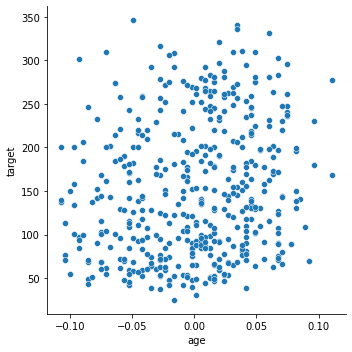

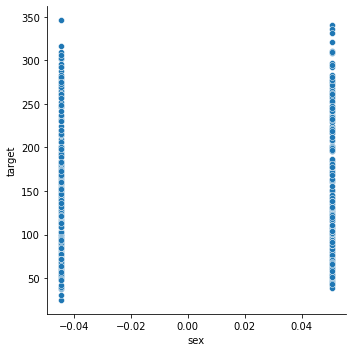

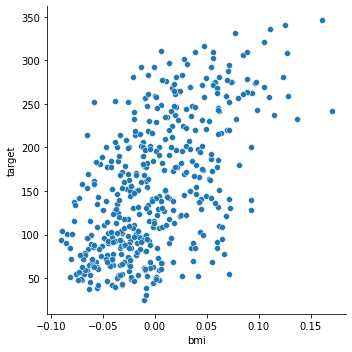

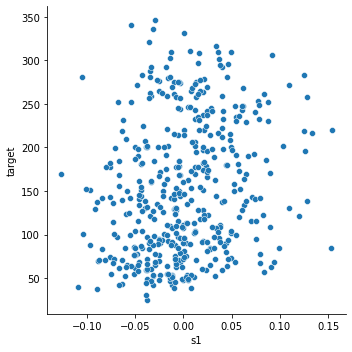

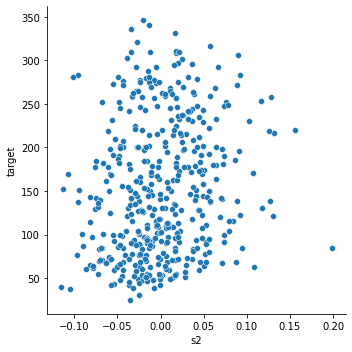

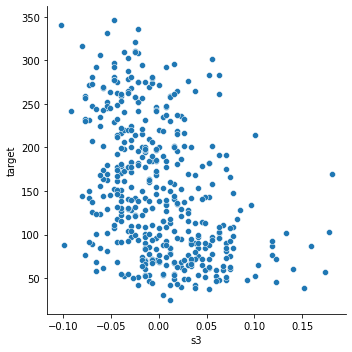

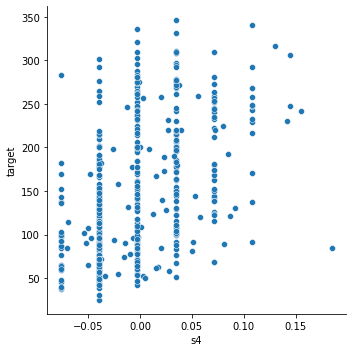

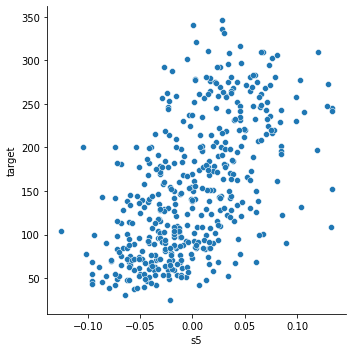

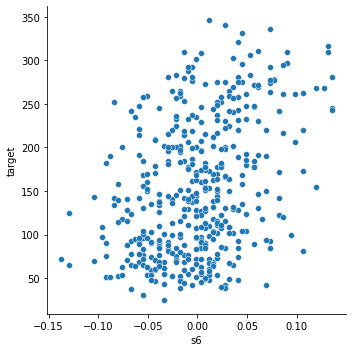

In [3]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
print(X.head())      # data(정보)
print(y.head())      # target(결과)

for c in X:
    sns.relplot(x= X[c], y = y, kind='scatter')

In [5]:
X, y = load_diabetes(return_X_y=True)


X = X[:,2][:,np.newaxis]     # bmi
# X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y) # 카테고리별 분류를 할때는 stratify=y 필요, 현재 자료는 카테고리가 없음

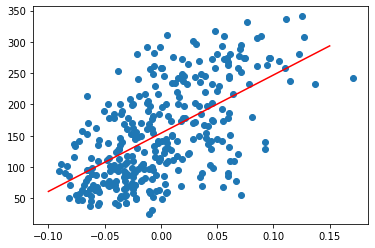

In [7]:
_, axe = plt.subplots()
axe.scatter(X_train, y_train)

xs = np.linspace(-0.1, 0.15, 100)
axe.plot(xs, 930.65*xs + 154.,71, c='r')

In [8]:
m = LinearRegression().fit(X_train, y_train)  
# m.fit(X_train, y_train)  

[965.16190118] 151.01303006052655


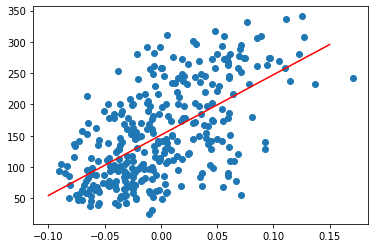

In [10]:
def myline(xvalue, a = 1, b = 1):
    return a * xvalue + b

# print(m.predict(X_test))
# print(y_test)
print(m.coef_, m.intercept_)    # y = 930.65x + 154.71

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
xs = np.linspace(-0.1, 0.15, 100)
axe.plot(xs, myline(xs, m.coef_, m.intercept_), c='r')

In [11]:
def myline(xvalue, a = 1, b = 1):
    return a * xvalue + b

def myerr(y, y_hat):
    return y - y_hat


# 한점에 맞는 선을 찾으러 감
def brute(x, y):
    a = 1.0
    b = 1.0
    y_hat = a * x + b
    while y - y_hat > 3:
        a = a + x
        b = b + 1
        y_hat = a * x + b
    return a, b

def back_prop(x, y, a=1.0, b=1.0):
    y_hat = a * x + b
    err = y - y_hat
    a = a + x * err
    b = b + 1 * err
    return a, b


###############################################################################################################

_, axe = plt.subplots()
axe.set_xlim(-0.1, 0.15)
axe.set_ylim(-10, 350)

axe.scatter(X_train[100], y_train[100])

xs = np.linspace(-0.1, 0.15, 100)
axe.plot(xs, myline(xs, a=1, b=1), c='r')
pred = myline(X_train[100], a=1, b=1)
print('pred', pred, 'actual',  y_train[100], 'err', myerr(y_train[100], pred))
      
axe.plot(xs, myline(xs, a=2, b=1), c='b')
pred = myline(X_train[100], a=2, b=1)
print('pred', pred, 'actual',  y_train[100], 'err', myerr(y_train[100], pred))
print(X_train[100])

a1, b1 = brute(X_train[100], y_train[100])
print(a1, b1)  # 기울기, 절편
axe.plot(xs, myline(xs, a=a1, b=b1), c='g')


a2, b2 = back_prop(X_train[100], y_train[100])
print(a2, b2)
axe.plot(xs, myline(xs, a=a2, b=b2), c='r')

pred [1.02397278] actual 265.0 err [263.97602722]
pred [1.04794557] actual 265.0 err [263.95205443]
[0.02397278]
[7.25689661] 262.0
[7.32824026] [264.97602722]


[522.33645602] [109.98962951]


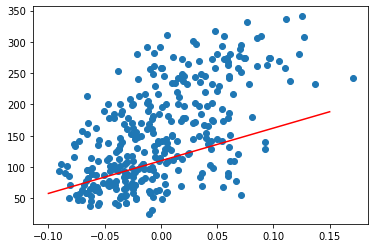

In [13]:
a = 1.0
b = 1.0

for x_i, y_i in zip(X_train, y_train):
    a, b = back_prop(x_i, y_i, a, b)
print(a, b)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
xs = np.linspace(-0.1, 0.15, 100)
axe.plot(xs, myline(xs, 522.33, 109.98), c='r')

[971.62158121] [110.84091005]


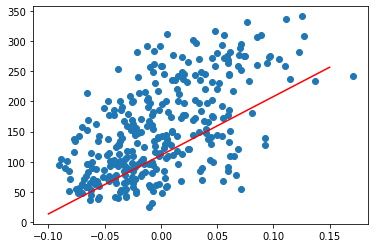

In [14]:
a = 1.0
b = 1.0
for i in range(1, 100):
    for x_i, y_i in zip(X_train, y_train):
        a, b = back_prop(x_i, y_i, a, b)
print(a, b)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
xs = np.linspace(-0.1, 0.15, 100)
axe.plot(xs, myline(xs, a, b), c='r')


In [17]:
a1 = np.arange(10, 20)
a2 = np.arange(100, 120)
for a1_i, a2_i in zip(a1, a2):
    pass
#     print(a1_i, a2_i)